<a href="https://colab.research.google.com/github/Jakaria6284/tensoreflow-model-api-end-point/blob/main/diamond_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [3]:
df=pd.read_csv('/content/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)



In [7]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [9]:
df.duplicated().sum()

146

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(53794, 10)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53794.0,0.797780,0.473390,0.2,0.40,0.70,1.04,5.01
depth,53794.0,61.748080,1.429909,43.0,61.00,61.80,62.50,79.00
table,53794.0,57.458109,2.233679,43.0,56.00,57.00,59.00,95.00
price,53794.0,3933.065082,3988.114460,326.0,951.00,2401.00,5326.75,18823.00
x,53794.0,5.731214,1.120695,0.0,4.71,5.70,6.54,10.74
y,53794.0,5.734653,1.141209,0.0,4.72,5.71,6.54,58.90
z,53794.0,3.538714,0.705037,0.0,2.91,3.53,4.03,31.80


In [14]:
df['x']=df['x'].replace(0,df['x'].mean())
df['y']=df['y'].replace(0,df['y'].mean())
df['y']=df['y'].replace(0,df['y'].mean())

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53794.0,0.797780,0.473390,0.20,0.40,0.70,1.04,5.01
depth,53794.0,61.748080,1.429909,43.00,61.00,61.80,62.50,79.00
table,53794.0,57.458109,2.233679,43.00,56.00,57.00,59.00,95.00
price,53794.0,3933.065082,3988.114460,326.00,951.00,2401.00,5326.75,18823.00
x,53794.0,5.731960,1.118786,3.73,4.71,5.70,6.54,10.74
y,53794.0,5.735293,1.139601,3.68,4.72,5.71,6.54,58.90
z,53794.0,3.538714,0.705037,0.00,2.91,3.53,4.03,31.80


In [16]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [17]:
for col in df.select_dtypes(include=['number']).columns:
  col_mean=df[col].mean()
  col_std=df[col].std()
  lower=col_mean-(3*col_std)
  upper=col_mean+(3*col_std)
  df=df[(df[col]>=lower) & (df[col]<=upper)]


In [18]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [19]:
label_data=df.copy()

In [20]:
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [21]:
label_encoder=LabelEncoder()
for col in label_data.select_dtypes(include=['object']).columns:
  label_data[col]=label_encoder.fit_transform(label_data[col])

In [22]:
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48


In [28]:
x=label_data.drop('price',axis=1)
y=label_data['price']
x.head(1)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43


In [30]:
y.head(1)

,price
0,326


In [34]:
X_tarin,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
X_tarin.shape,X_test.shape

((40840, 9), (10211, 9))

In [36]:
X_tarin.corr()

,carat,cut,color,clarity,depth,table,x,y,z
carat,1.000000,0.036369,0.275260,-0.205899,0.028432,0.187439,0.982349,0.981452,0.981247
cut,0.036369,1.000000,0.008916,0.007241,-0.217197,0.269946,0.040407,0.043929,0.017089
color,0.275260,0.008916,1.000000,-0.022450,0.044502,0.024553,0.252253,0.252387,0.256031
clarity,-0.205899,0.007241,-0.022450,1.000000,-0.040535,-0.084403,-0.217074,-0.214685,-0.219308
depth,0.028432,-0.217197,0.044502,-0.040535,1.000000,-0.276628,-0.021271,-0.023876,0.091997
table,0.187439,0.269946,0.024553,-0.084403,-0.276628,1.000000,0.193883,0.189169,0.160345
x,0.982349,0.040407,0.252253,-0.217074,-0.021271,0.193883,1.000000,0.998664,0.992464
y,0.981452,0.043929,0.252387,-0.214685,-0.023876,0.189169,0.998664,1.000000,0.992172
z,0.981247,0.017089,0.256031,-0.219308,0.091997,0.160345,0.992464,0.992172,1.000000


<Axes: >

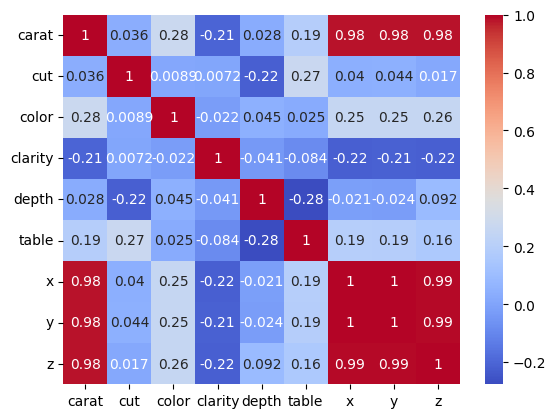

In [37]:
corr=X_tarin.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [38]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [39]:
corr_features = correlation(X_tarin, 0.7)
corr_features

{'x', 'y', 'z'}

In [40]:
X_tarin.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [ ]:
X_tarin.head()

,carat,cut,color,clarity,depth,table
5501,0.74,2,2,4,61.7,56.0
45403,0.51,4,0,5,62.5,58.0
10267,1.01,3,0,2,62.8,58.0
44681,0.50,3,0,2,62.3,58.0
52375,0.71,4,2,2,59.0,61.0


In [ ]:
X_test.head()

,carat,cut,color,clarity,depth,table
38898,0.53,2,5,2,62.8,57.0
7336,0.85,4,0,5,61.8,56.0
19176,1.51,1,4,3,62.8,60.0
12815,1.01,3,2,2,62.3,58.0
21177,1.24,3,2,4,61.5,57.0


In [42]:
# Define the pipelines
pipeline_lr = Pipeline([("scaler", StandardScaler()), ("model", LinearRegression())])
pipeline_dt = Pipeline([("scaler", StandardScaler()), ("model", DecisionTreeRegressor())])
pipeline_rf = Pipeline([("scaler", StandardScaler()), ("model", RandomForestRegressor())])
pipeline_kn = Pipeline([("scaler", StandardScaler()), ("model", KNeighborsRegressor())])
pipeline_xgb = Pipeline([("scaler", StandardScaler()), ("model", XGBRegressor())])

# List of model names and pipelines
pipelines = [
    ("LinearRegression", pipeline_lr),
    ("DecisionTree", pipeline_dt),
    ("RandomForest", pipeline_rf),
    ("KNeighbors", pipeline_kn),
    ("XGBRegressor", pipeline_xgb),
]

# Store cross-validation results
cv_results_rms = []

# Perform cross-validation and print results
for model_name, pipeline in pipelines:
    # Perform 10-fold cross-validation
    cv_score = cross_val_score(pipeline, X_tarin, y_train, scoring="neg_root_mean_squared_error", cv=10)
    # Append the mean CV score to the results list
    cv_results_rms.append(cv_score.mean())
    # Print the result
    print(f"{model_name}: {cv_score.mean():.4f}")

LinearRegression: -1150.9757
DecisionTree: -593.1436
RandomForest: -450.8713
KNeighbors: -731.1821
XGBRegressor: -434.5775


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Fit the model on the training data
pipeline_xgb.fit(X_tarin, y_train)

# Predict on the test data
y_pred = pipeline_xgb.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print("Model Performance Metrics for XGBRegressor:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Model Performance Metrics for XGBRegressor:
Mean Absolute Error (MAE): 239.9537
Mean Squared Error (MSE): 191615.6915
Root Mean Squared Error (RMSE): 437.7393
R² Score: 0.9828
